<a href="https://colab.research.google.com/github/autinn/deep-tech-talent/blob/main/Lab07_H_Stock_Price_Prediction_for_HKSE_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab07: Project - Predict an equity price trend using LSTM**
To predict the price of a stock in Hong Kong based on the current Close Price.
Using the Long Short Term Memory (LSTM) to predict the closing price of a company HSBC based on the past 60 days of stock price.

In [ ]:
!pip install yfinance

In [ ]:
# Import the libraries required for the tasks
import math
from pandas_datareader import data as pdr
import yfinance as yfin
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
yfin.pdr_override()

In [ ]:
# Get the stock quote for HSBC from Yahoo Fiance (provided by pandas_datareader)using the stock ticker 0005.HK from Jan 1 2001 to Dec 7, 2020.
df = pdr.get_data_yahoo("0005.HK", start="2001-01-01", end="2020-12-07")
# display the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-01,114.000000,116.000000,113.500000,116.000000,60.686638,0
2001-01-02,115.000000,115.000000,112.500000,113.500000,59.378723,3085154
2001-01-03,112.000000,112.000000,110.500000,112.000000,58.593987,3461595
2001-01-04,116.500000,117.000000,115.500000,116.500000,60.948196,10423511
2001-01-05,120.000000,120.000000,118.000000,118.500000,61.994518,15673431
...,...,...,...,...,...,...
2020-11-30,42.000000,42.049999,41.299999,41.500000,39.978687,35056130
2020-12-01,40.700001,41.549999,40.500000,41.000000,39.497017,48696915
2020-12-02,41.950001,43.000000,41.950001,42.500000,40.942032,57225027


In [ ]:
# display the shape of the dataset
df.shape

(4977, 6)

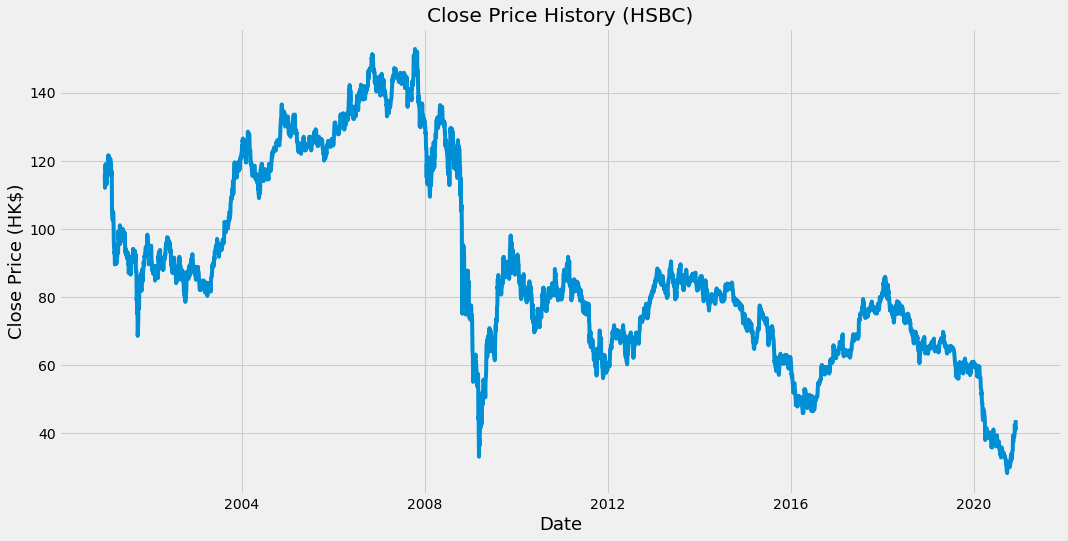

In [ ]:
# Visualise the record in the dataset in the form a graph (for closing price history for HSBC Plc.)
plt.figure(figsize=(16,8)) # Figure Size (Width , Height)
plt.title('Close Price History (HSBC)')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (HK$)',fontsize=18)
plt.show()


## **Data Preprocessing**

In [ ]:
# Create a new dataframe with only "Close Price" column
data=df.filter(['Close']) # You can extract more by adding more column names: data=df.filter(['Close','Open','Low'])

# Converting the dataframe to a numpy array
dataset=data.values

# Decide the training dataset ratio to train the model (dataset splitting) 90% for training
training_data_len=math.ceil(len(dataset)*.9)


In [ ]:
# Data Normalising
# Scale all the data to be values between 0 and 1 (* Neural Network models are better at dealing with floating point numbers between 0 and 1)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
# Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]  # 0:training_data_len  --> It means to get the row form 0 to 4708 | , | : --> it means get all column for each row
                        #Ref: more about indexing: https://blog.csdn.net/Together_CZ/article/details/79593952

# Split the data into input and output dataset (x_train - input, y_train - output)
x_train=[]  # list object
y_train=[]  # list object
for i in range(60,len(train_data)):  # 60 to 4708 . 60 means 60 days
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

#** Use the past 60 as data, one day after as Label **
#Data         Label
#x_train       y_train
#[0:60,0]  -->   [60:0]
#[1:61,0]  -->   [61:0]
#[2:62,0]  -->   [62:0]
#[3:63,0]  -->   [63:0]
#[4:64,0]  -->   [64:0]
#      ...
#[4648:4708,0]  -->   [4708:0]

In [ ]:
# Convert x_train and y_train from list to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
# Reshape the data to be 3-dimensional form (no of samples, no of time steps, no of features) into the shape accepted by LSTM
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) # Reshape from (4649,60) to (4649, 60, 1)
x_train.shape

(4420, 60, 1)

# Building the Model
Build LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [ ]:
# Build LSTM model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the LSTM Model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
# Train the LSTM Model
model.fit(x_train,y_train,batch_size=5,epochs=10)


Epoch 1/10
884/884 [==============================] - 35s 35ms/step - loss: 0.0018
Epoch 2/10
884/884 [==============================] - 31s 36ms/step - loss: 4.3920e-04
Epoch 3/10
884/884 [==============================] - 33s 37ms/step - loss: 3.3925e-04
Epoch 4/10
884/884 [==============================] - 32s 36ms/step - loss: 2.7133e-04
Epoch 5/10
884/884 [==============================] - 31s 35ms/step - loss: 2.4802e-04
Epoch 6/10
884/884 [==============================] - 31s 35ms/step - loss: 2.1396e-04
Epoch 7/10
884/884 [==============================] - 32s 36ms/step - loss: 1.7630e-04
Epoch 8/10
884/884 [==============================] - 32s 36ms/step - loss: 1.6668e-04
Epoch 9/10
884/884 [==============================] - 32s 36ms/step - loss: 1.6682e-04
Epoch 10/10
884/884 [==============================] - 33s 37ms/step - loss: 1.6061e-04


In [ ]:
# Create test dataset
test_data=scaled_data[training_data_len-60:,:] # Get the remaining 10% data as testing data
# Create test dataset for x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

# Convert the x_test set to a numpy array for use in LSTM model testing
x_test=np.array(x_test)
# Reshape the data into shape accepted by LSTM model
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Model Testing

In [ ]:
# Getting the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions) # undo the scaling (normalising)
# Measure the model assessment  for accuracy
# Value of 0 means the model predicting value matching the actual value from the  test dataset perfectly; the lower the value the better the model performed.
# there are many metrics to value the performance of the model. Root Mean Square Error (RMSE) is used here.
# Calculate the value of RMSE as follows:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse
print("RMSE value :",rmse)

RMSE value : 1.0434155443496438


# Data Testing
Model validation completed with acceptable prediction accuracy, data testing is launching now.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


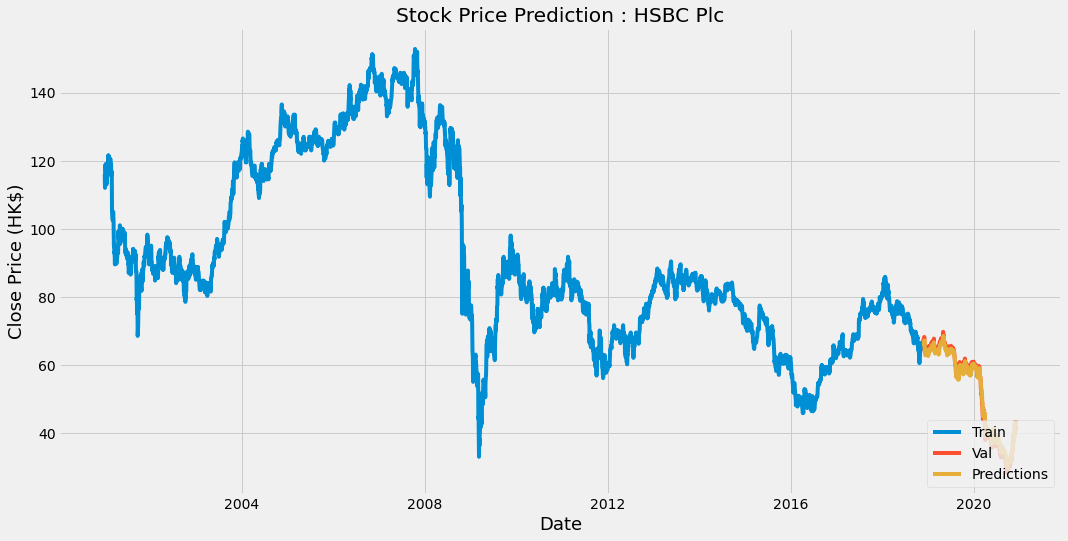

In [ ]:
# Create and plot the data for a graph
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction : HSBC Plc')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (HK$)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
# Display the actual (valid) and predicted prices
valid

,Close,Predictions
Date,,
2018-11-29,66.650002,66.619720
2018-11-30,66.900002,65.901436
2018-12-03,68.199997,65.986320
2018-12-04,68.099998,67.060524
2018-12-05,66.300003,67.157242
...,...,...
2020-11-30,41.500000,42.354568
2020-12-01,41.000000,42.015945
2020-12-02,42.500000,41.591312


# **Other Example (Reference)**

In [ ]:
# Get the quote
apple_quote=pdr.get_data_yahoo("0005.HK", start='2020-07-01',end='2020-12-31')
# Create a new dataframe
new_df=apple_quote.filter(['Close'])
# Get the last 60 days of closing price
last_60_days=new_df[-60:].values
# Scale the data to be values between 0 to 1
last_60_days_scaled=scaler.transform(last_60_days)
# Create an empty list
x_test1=[]
# Append the past 60 days
x_test1.append(last_60_days_scaled)
# Convert the x_test1 dataset to a numpy array
x_test1=np.array(x_test1)
# Reshape the data
x_test1=np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
# Get the predicted scaled price
pred_price=model.predict(x_test1)
# Undo the scaling /normalisation
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[41.012695]]


In [ ]:
# Extract the actual price of HSBC on a particular day
apple_quote_now=pdr.get_data_yahoo("0005.HK", start='2020-04-01',end='2020-04-02')
print("HSBC Plc for the date (HK$):",apple_quote_now['Close'])

[*********************100%***********************]  1 of 1 completed
HSBC Plc for the date (HK$): Date
2020-04-01    39.950001
Name: Close, dtype: float64


# **Exercise**
Using the Long Short Term Memory (LSTM) to predict the adj closing price of a company Tecent (0700) based on the past 50 days of stock adj closeing price. You can use the period between 2005-01-03 to 2020-12-04 as the traingng data

In [ ]:
# Your code here